# Setup and Fetch Data
Press the play button in Google Colab or press Shift+Enter execute the cell below to download and load the data and packages for this assignment

This will setup you environment and a `DataFrame`, with four columns, `sales`, `site_visits`, `total_customers`, and `production_cost`

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
np.random.seed(42)
from matplotlib import pyplot as plt

from scipy.stats import t, f

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16

sales = np.linspace(100, 800, 100)

a = 100
b = 0.5
gamma = 50

# We have a simple linear relationship between site visits and sales
site_visits = a + b*sales + np.random.randn(sales.shape[0])*gamma

# We have a slightly more complicated relationship
# between sales and total customers. Our sales 
# plateau once we reach some level of customers
total_customers = (1-sales)**2/200
total_customers = total_customers + np.random.randn(sales.shape[0])*600
total_customers = np.abs(total_customers)

production_cost = -np.sqrt(sales*10) + sales.max() + np.random.randn(sales.shape[0])*10


data = pd.DataFrame(
    {
        'sales': sales, 
        'site_visits': site_visits,
        'total_customers': total_customers, 
        'production_cost': production_cost
    }
)

# Inspecting the data

We have four columns in our `DataFrame`:
* **`sales`**: Total sales for the online company
* **`site_visits`**: Total visits to the company e-commerce site
* **`total_customers`**: Total number of customers at the time of the reported sales
* **`production_cost`**: Total production cost at the time of the reported sales

In [16]:
data.head()

,sales,site_visits,total_customers,production_cost
0,100.000000,174.835708,800.217445,771.955097
1,107.070707,146.622138,196.132219,772.886185
2,114.141414,189.455134,141.623812,777.045691
3,121.212121,236.757553,409.111591,775.722489
4,128.282828,152.433745,15.766835,750.406714


In [17]:
data.describe()

,sales,site_visits,total_customers,production_cost
count,100.000000,100.000000,100.000000,100.000000
mean,450.000000,319.807674,1324.385297,735.560448
std,205.131761,114.001146,976.048028,20.545249
min,100.000000,100.295584,15.766835,694.212683
25%,275.000000,218.702006,454.341382,719.872998
50%,450.000000,312.123104,1230.943489,733.498833
75%,625.000000,417.046896,2094.050052,748.206605
max,800.000000,520.149421,3794.197307,798.075323


# Example: Creating a fit for site visits

For this example, we'll: 
* Create a model to fit sales ($Y$) vs. site visits ($X$)
* Print out the fit results
* Plot the fitted values
* Plot the residuals

Let's start by creating a scatter plot for the `sales` vs. `site_visits`: 

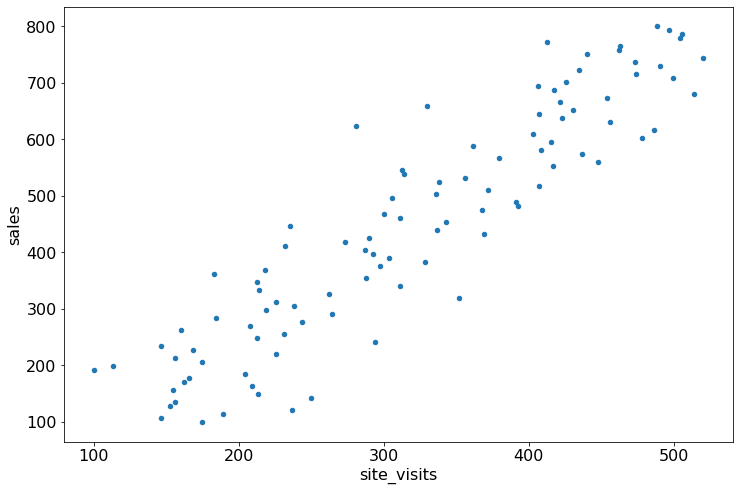

In [18]:
data.plot.scatter('site_visits','sales')

Next, let's create the model, fitting the data, and printing out the fit results:

In [19]:
# Create an instance of an OLS model
model = ols(formula='sales ~ site_visits + 1', data=data)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     520.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           5.27e-41
Time:                        22:20:40   Log-Likelihood:                -581.61
No. Observations:                 100   AIC:                             1167.
Df Residuals:                      98   BIC:                             1172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -77.9353     24.543     -3.175      

**Is the fit significant (_hint: check the p-value for the F-statistic_)?**

**Are the estimated values for the slope and intercept significant?**

Now let's plot the `results.fittedvalues` on top of the scatter plot for a qualitative estimate of the goodness of fit

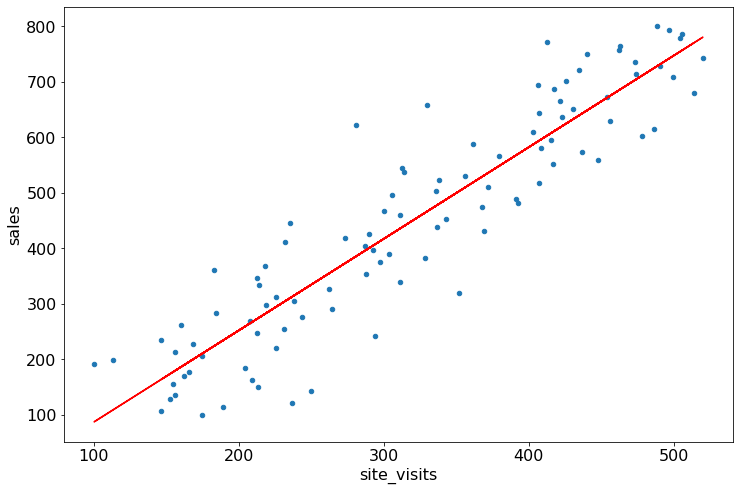

In [20]:
data.plot.scatter('site_visits','sales')

plt.plot(data['site_visits'], results.fittedvalues, color='red')

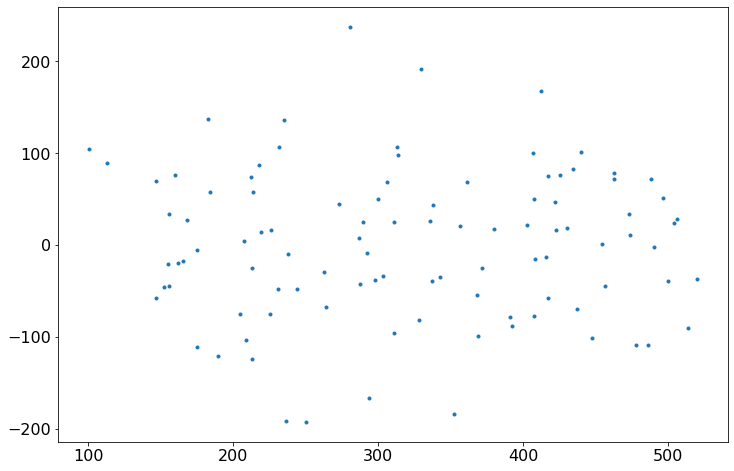

In [21]:
residuals = results.resid

plt.plot(data['site_visits'], residuals, linestyle='', marker='.')

# Repeat Regression Analysis Above for `total_customers`

In the first cell below, do the following:
* Create a scatter plot of the data
* Create a model instance with the correct formula
* Fit the model to generate results and display the summary with `print(results.summary()`
* Plot `results.fittedvalues` as above on the same axes as the scatter plot of the original data

In the second cell, plot the residuals. Are the residuals randomly distributed, or do you notice a pattern?

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     213.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           2.36e-26
Time:                        22:20:44   Log-Likelihood:                -615.93
No. Observations:                 100   AIC:                             1236.
Df Residuals:                      98   BIC:                             1241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         219.5578     19.555     

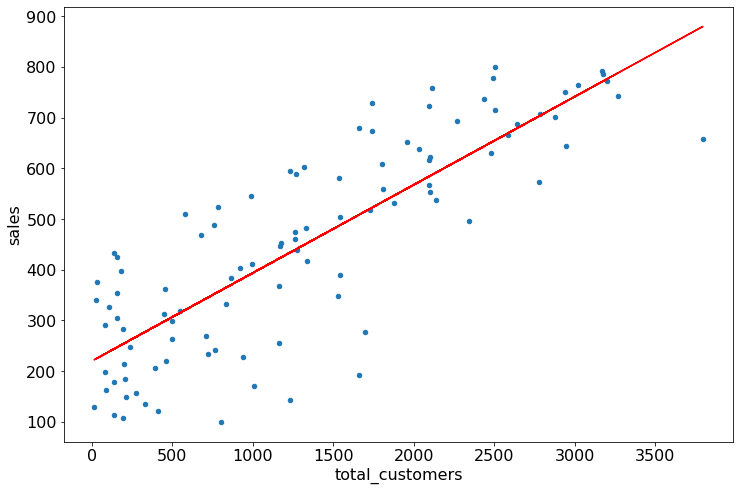

In [22]:
# YOUR CODE HERE

data.plot.scatter('total_customers','sales')

# Create an instance of 
model = ols(formula='sales ~ total_customers + 1', data=data)
results = model.fit()

print(results.summary())

plt.plot(data['total_customers'], results.fittedvalues, color='red')

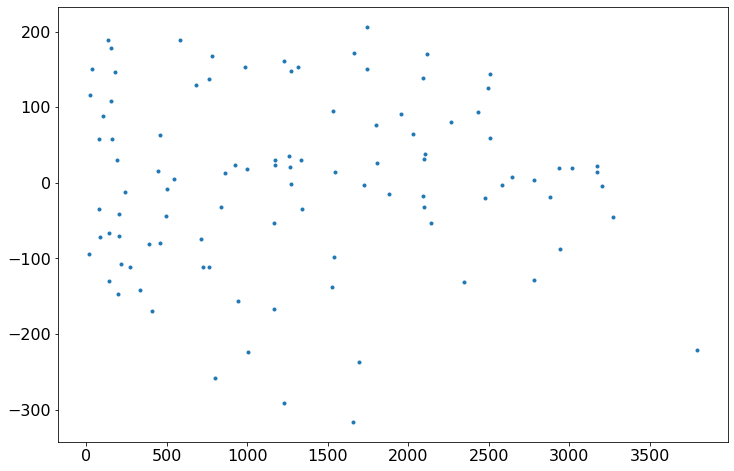

In [23]:
# YOUR CODE HERE

residuals = results.resid

plt.plot(data['total_customers'], residuals, linestyle='', marker='.')

# Repeat Regression Analysis Above for `production_cost`

In the first cell below, do the following:
* Create a scatter plot of the data
* Create a model instance with the correct formula
* Fit the model to generate results and display the summary with `print(results.summary()`
* Plot `results.fittedvalues` as above on the same axes as the scatter plot of the original data

In the second cell, plot the residuals. Are the residuals randomly distributed, or do you notice a pattern?

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     226.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           3.17e-27
Time:                        22:20:47   Log-Likelihood:                -613.89
No. Observations:                 100   AIC:                             1232.
Df Residuals:                      98   BIC:                             1237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6585.7900    407.841     

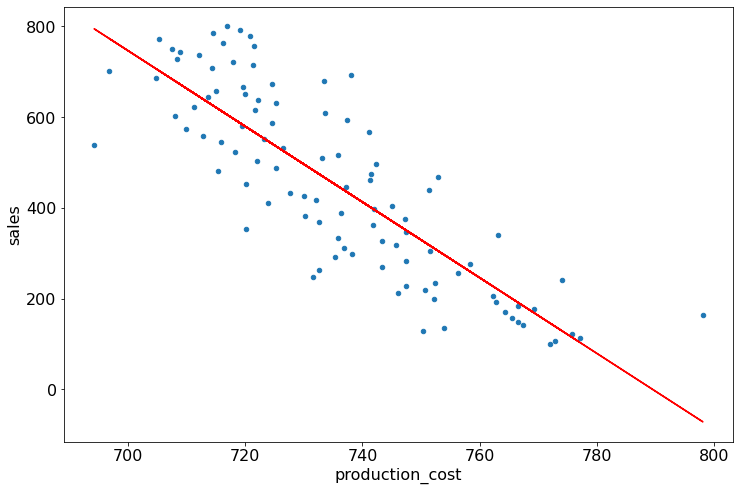

In [24]:
# YOUR CODE HERE

data.plot.scatter('production_cost','sales')

model = ols(formula='sales ~ production_cost + 1', data=data)
results = model.fit()

print(results.summary())

plt.plot(data['production_cost'], results.fittedvalues, color='red')

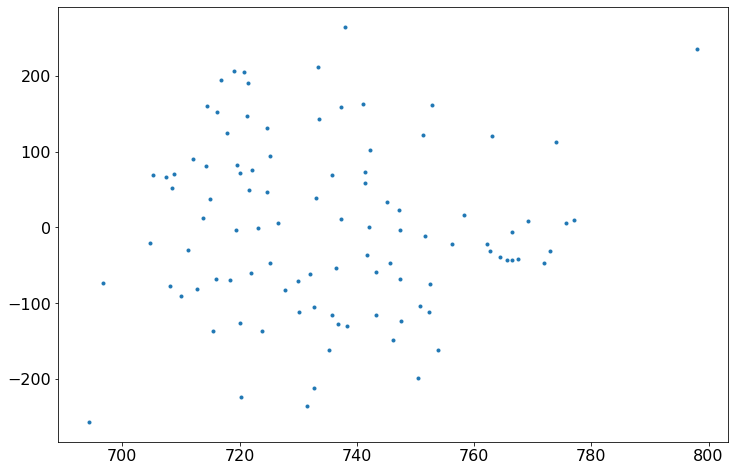

In [26]:
# YOUR CODE HERE

residuals = results.resid

plt.plot(data['production_cost'], residuals, linestyle='', marker='.')